<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/XMatch_With_GAIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries 

In [1]:
!pip install mpl-scatter-density

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 KB 3.3 MB/s eta 0:00:00


In [2]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.2 MB/s eta 0:00:00


In [3]:
!pip install isochrones

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 431.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for isochrones: filename=isochrones-2.1-py3-none-any.whl size=93782 sha256=45c1a63200976852307da6df5bc0d10fab670005550b9e205eb853701761617e
  Stored in directory: /root/.cache/pip/wheels/a1/3b/ef/6c475626f751b30cc195cd997b8030e079e0643e869c060e47
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=959e113cda1f95301f8d05003ccd29bc69a987c8931ce9d497f0b0465b3d6d8e
  Stored in directory: /root/.cache/pip/wheels/a3/d7/75/19cd0d2a893cad4bb0b2b16dd572ad2916d19c0d5ee9612511
Successfully built isochrones asciitree


# Main Problem

By using a query presented in the article, I add data here. All filters mentioned in section 2 are applied by conditions that were added to the SQL script. Although I tried hard to select more stars, I could not select more than 80,000 stars.



In [4]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [6]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighb

In [ ]:
%%time
job = Gaia.launch_job_async("SELECT TOP 80000 phot_g_mean_mag+5*log10(parallax)-10 AS mg , bp_rp FROM gaiadr2.gaia_source \
WHERE parallax_over_error > 10 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20 \
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2) \
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2) \
AND visibility_periods_used>8 \
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))", dump_to_file=True) 

print (job)

In [29]:
%%time
job = Gaia.launch_job_async("SELECT TOP 80000 phot_g_mean_mag+5*log10(parallax)-10 AS mg , bp_rp , ra , dec FROM gaiadr2.gaia_source  \
WHERE ra > 1 \
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))", dump_to_file=True) 

print (job)

Jobid: 1674510951923O
Phase: COMPLETED
Owner: None
Output file: 1674510951923O-result.vot.gz
Results: None
CPU times: user 52.6 ms, sys: 8.52 ms, total: 61.1 ms
Wall time: 2.76 s


In [33]:
Data = job.get_results()

In [34]:
Data

mg,bp_rp,ra,dec
,mag,deg,deg
float64,float32,float64,float64
5.84295426024765,1.5790176,145.11807394747154,-50.55227923531857
11.334230303587212,1.8469105,144.76105861491703,-50.452120042232984
4.338810761280614,1.2259493,145.22940965338384,-50.392719603912035
5.265813261551916,1.4529037,144.868289043894,-50.34359781658349
8.947853199598917,1.4538612,145.2362300498511,-50.378949735603015
10.094410322536227,1.6771965,144.85244904468027,-50.554660701844256
9.452783377346837,1.6564198,144.49882184989417,-50.39987738553374
7.210349913165739,1.5637989,38.49850727558449,57.86401840592486


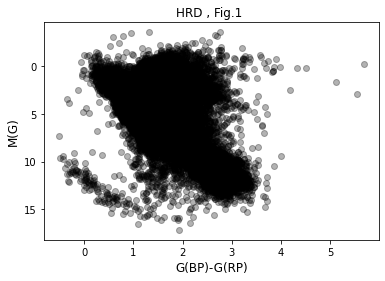

In [32]:
plt.scatter(Data['bp_rp'], Data['mg'], color='black', alpha=0.3)
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.show()

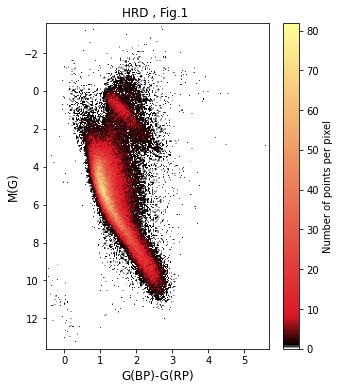

In [ ]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Data['bp_rp']
Y = Data['mg']
using_mpl_scatter_density(fig, X , Y )
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Fig_1' , dpi=300)
plt.show()

# Extensions Problem 1 , Figure 5  (Low-extinction)

There are several ways to select low-extinction stars. The simplest one is selecting stars located in the local bubble because dimming and reddening caused by dust are less in this area. To apply this filter, I increase the low band of parallax_over_error in the query. However, the plot is not similarly close to the one in the article because of fewer stars selected.

In [ ]:
%%time
job = Gaia.launch_job_async("SELECT TOP 30000 phot_g_mean_mag+5*log10(parallax)-10 AS mg , bp_rp FROM gaiadr2.gaia_source \
WHERE parallax_over_error > 20 \ 
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20 \
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2) \
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2) \
AND visibility_periods_used>8 \
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))", dump_to_file=True) 

print (job)

Saving results to: 1634283596249O-result.vot.gz
Jobid: 1634283596249O
Phase: COMPLETED
Owner: None
Output file: 1634283596249O-result.vot.gz
Results: None
CPU times: user 37.1 ms, sys: 11.1 ms, total: 48.1 ms
Wall time: 3.07 s


In [ ]:
Data = job.get_results()

In [ ]:
Data

mg,bp_rp
,mag
float64,float32
4.75180706094207,1.1329775
4.228241104994574,1.1012192
1.6418152870844782,1.5916977
9.116751615205605,2.6364174
3.880993087566477,1.1079025
4.772849571702029,0.9004898
9.796139284569648,2.482708
3.759189810878288,0.8022413


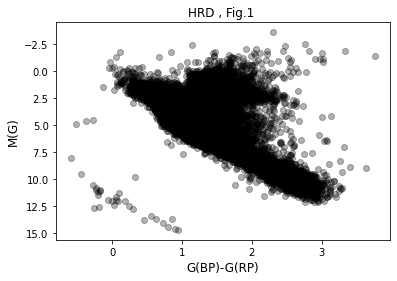

In [ ]:
plt.scatter(Data['bp_rp'], Data['mg'], color='black', alpha=0.3)
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.show()

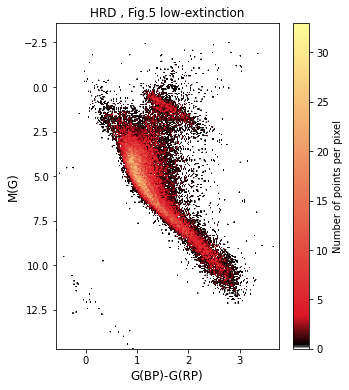

In [ ]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Data['bp_rp']
Y = Data['mg']
using_mpl_scatter_density(fig,X , Y )
plt.title("HRD , Fig.5 low-extinction" ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Fig_5' , dpi=300)
plt.show()

# Extensions Problem 2 , Gaia EDR3

By changing the data source in the query, we can use the Gaia EDR3 catalogue and then plot HRD. Also, all filters mentioned in the second section of the article are applied. Unfortunately, I could not select more than 80,000 stars here. 

In [ ]:
%%time
job = Gaia.launch_job_async("SELECT TOP 80000 phot_g_mean_mag+5*log10(parallax)-10 AS mg , bp_rp FROM gaiaedr3.gaia_source \
WHERE parallax_over_error > 10 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20 \
AND phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2) \
AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2) \
AND visibility_periods_used>8 \
AND astrometric_chi2_al/(astrometric_n_good_obs_al-5)<1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))", dump_to_file=True) 

print (job)

Saving results to: 1634283617424O-result.vot.gz
Jobid: 1634283617424O
Phase: COMPLETED
Owner: None
Output file: 1634283617424O-result.vot.gz
Results: None
CPU times: user 37.3 ms, sys: 21.2 ms, total: 58.5 ms
Wall time: 3.75 s


In [ ]:
Data = job.get_results()

In [ ]:
Data

mg,bp_rp
,mag
float64,float32
3.9543723376943873,0.7596445
7.639986165703469,1.7635632
6.737422622156441,1.5011883
3.145360903525102,1.0211725
6.362183144364948,1.3602543
6.183743041846789,1.103529
3.48241740208093,1.2243423
1.3820295888417746,1.3192301


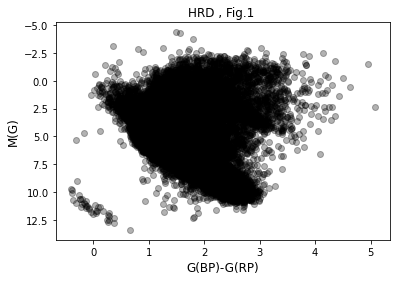

In [ ]:
plt.scatter(Data['bp_rp'], Data['mg'], color='black', alpha=0.3)
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.show()

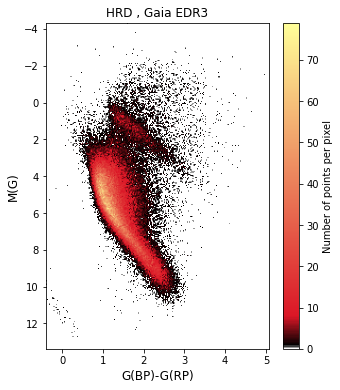

In [ ]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Data['bp_rp']
Y = Data['mg']
using_mpl_scatter_density(fig , X , Y )
plt.title("HRD , Gaia EDR3" ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Gaia EDR3' , dpi=300)
plt.show()


# Extensions Problem 3 , HRD of Stellar cluster

Two following sites are uesed fo these section :
*   https://astroquery.readthedocs.io/en/latest/vizier/vizier.html
*   http://tapvizier.u-strasbg.fr/adql/?%20J/A+A/618/A93/table1%20J/A+A/618/A93/members

I add data with another method and plot HRD for all of the stars and one cluster mentioned in A.3 Table. Filters are not applied to this catalogue.

In [ ]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('Gaia DR2')
print({k:v.description for k,v in catalog_list.items()})

{'I/345': 'Gaia DR2 (Gaia Collaboration, 2018)', 'I/347': 'Distances to 1.33 billion stars in Gaia DR2 (Bailer-Jones+, 2018)', 'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)', 'II/360': 'Gaia DR2 x AllWISE catalogue (Marton+, 2019)', 'IV/35': 'Gaia DR2-WISE Galactic Plane Matches (Wilson+, 2018)', 'VI/156': 'M-dwarf Lum-Temp-Radius relationships (Morrell+, 2019)', 'VII/285': 'Gaia DR2 quasar and galaxy classification (Bailer-Jones+, 2019)', 'J/ApJ/862/138': 'BANYAN. XIII. Nearby young assoc. with Gaia DR2 (Gagne+, 2018)', 'J/ApJ/863/89': 'Gaia DR2 PMs of stars in ultra-faint MW satellites (Simon, 2018)', 'J/ApJ/866/99': 'Revised radii of KIC stars & planets using Gaia DR2 (Berger+, 2018)', 'J/ApJ/867/151': 'YSOs in the Gould Belt regions with Gaia-DR2 data (Dzib+, 2018)', 'J/ApJ/868/70': 'Hot subdwarf stars from Gaia DR2 and LAMOST DR5 (Lei+, 2018)', 'J/ApJ/870/32': 'Kinematics in young star clusters & associations (Kuhn+, 2019)', 'J/ApJ/872/85': 'Detached ec

In [ ]:
vizier = Vizier(columns=[])
vizier.ROW_LIMIT = -1

In [ ]:
catalogs = vizier.get_catalogs("J/A+A/618/A93")
print(catalogs)

TableList with 2 tables:
	'0:J/A+A/618/A93/table1' with 18 column(s) and 1229 row(s) 
	'1:J/A+A/618/A93/members' with 16 column(s) and 401448 row(s) 


In [ ]:
Data_Cluster = catalogs[1]

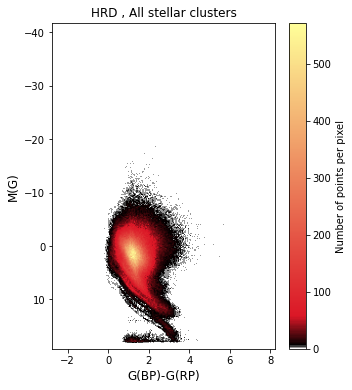

In [ ]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Data_Cluster['BP-RP']
Y = Data_Cluster['Gmag'] + (5 * np.log(Data_Cluster['plx'])) - 10
using_mpl_scatter_density(fig, X , Y )
plt.title("HRD , All stellar clusters" ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_All_Clusters' , dpi=300)
plt.show()

The shape is not similar to HRDs that we had. Perhaps, it is the result of neglecting the filters perhaps.

In [ ]:
from collections import Counter
Counter(list(Data_Cluster['Cluster']))

Counter({'Alessi_10': 75,
         'Alessi_12': 349,
         'Alessi_13': 48,
         'Alessi_15': 17,
         'Alessi_17': 116,
         'Alessi_18': 37,
         'Alessi_19': 181,
         'Alessi_1': 63,
         'Alessi_20': 128,
         'Alessi_21': 193,
         'Alessi_24': 191,
         'Alessi_2': 276,
         'Alessi_31': 215,
         'Alessi_37': 202,
         'Alessi_3': 256,
         'Alessi_43': 386,
         'Alessi_44': 544,
         'Alessi_53': 106,
         'Alessi_59': 38,
         'Alessi_5': 308,
         'Alessi_60': 279,
         'Alessi_62': 162,
         'Alessi_6': 294,
         'Alessi_8': 82,
         'Alessi_9': 210,
         'Alessi_Teutsch_11': 137,
         'Alessi_Teutsch_12': 103,
         'Alessi_Teutsch_3': 124,
         'Alessi_Teutsch_5': 297,
         'Alessi_Teutsch_8': 500,
         'Andrews_Lindsay_5': 666,
         'Antalova_2': 49,
         'Archinal_1': 68,
         'Arp_Madore_2': 70,
         'ASCC_101': 82,
         'ASCC_105': 266

In [ ]:
# Blanco_1 is selected among stellar clusters of Table A.3 . 
Data_Selected_Cluster = Data_Cluster[Data_Cluster['Cluster'] == 'Blanco_1']
Data_Selected_Cluster

RA_ICRS,DE_ICRS,Source,GLON,GLAT,plx,pmRA,pmDE,o_Gmag,Gmag,BP-RP,PMemb,Cluster,SimbadName,_RA.icrs,_DE.icrs
deg,deg,,deg,deg,mas,mas / yr,mas / yr,,mag,mag,,,,deg,deg
float64,float64,int64,float64,float64,float64,float64,float64,int16,float64,float64,float32,str17,str28,float64,float64
-0.64633850868,-29.04211046067,2333153679752698368,20.6579309486,-77.9388645792,4.2766,18.533,2.166,209,15.040868,1.907647,1.0,Blanco_1,Gaia DR2 2333153679752698368,359.35357022032,-29.04211978647
-0.52023197632,-28.96201726014,2333161479413305984,20.9879027539,-78.0566407036,4.4703,18.891,2.143,165,17.361666,2.799160,1.0,Blanco_1,Gaia DR2 2333161479413305984,359.47967506168,-28.96202648691
-0.17299078158,-28.35778670415,2333306099552537728,23.8296431518,-78.4061192229,4.3530,19.219,2.262,262,15.385542,2.022717,1.0,Blanco_1,Gaia DR2 2333306099552537728,359.82691518592,-28.35779644328
-0.06309218471,-28.25635240942,2333308401655007872,24.3122870432,-78.5077236588,4.3383,18.998,1.732,249,12.387129,0.995317,0.9,Blanco_1,,359.93681495267,-28.25635986661
-0.72953940885,-28.07005430059,2333284998377999872,25.3216201670,-77.9268102375,4.1573,19.080,2.420,222,17.775980,3.169872,1.0,Blanco_1,Gaia DR2 2333284998377999872,359.27036748992,-28.07006472000
-0.44711588578,-28.60392771837,2333202779818803584,22.6928448343,-78.1505564797,4.0717,19.210,2.439,235,17.171020,2.684488,1.0,Blanco_1,Gaia DR2 2333202779818803584,359.55278990645,-28.60393821959
-0.35313425169,-27.83928347275,2333385333109198208,26.4164225910,-78.2626737851,4.3552,19.862,2.628,232,17.047653,2.701981,0.8,Blanco_1,,359.64676903823,-27.83929478772
1.83311521139,-28.16131933928,2333465253860212352,24.3487072679,-80.1813889278,4.1794,18.787,3.328,190,17.958715,2.996283,0.9,Blanco_1,,1.83302346180,-28.16133366814


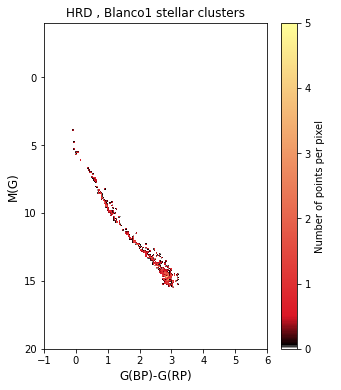

In [ ]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Data_Selected_Cluster['BP-RP']
Y = Data_Selected_Cluster['Gmag'] + 5 * np.log(Data_Selected_Cluster['plx']) - 10
using_mpl_scatter_density(fig , X , Y )
plt.xlim(-1,6)
plt.ylim(-4,20)
plt.title("HRD , Blanco1 stellar clusters" ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Blanco1' , dpi=300)
plt.show()

This figure shows that this cluster ( Blanco_1 ) is located in main sequence.  